In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset
data = pd.read_csv('courriels.csv', encoding='latin-1')
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Renommer la colonne Message en Email
data = data.rename(columns={'Message': 'Email'})

# Transformer la variable cible en valeurs numériques
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['Email'], data['Category'], test_size=0.2, random_state=42)

# Affichage des cinq premières lignes des données d'entraînement
print("Données d'entraînement :")
print(X_train.head())
print(y_train.head())

# Affichage des cinq premières lignes des données de test
print("\nDonnées de test :")
print(X_test.head())
print(y_test.head())


Données d'entraînement :
1978    Reply to win Â£100 weekly! Where will the 2006...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
Name: Email, dtype: object
1978    1
3989    0
3935    0
4078    0
4086    1
Name: Category, dtype: int64

Données de test :
3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! iÂ...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
Name: Email, dtype: object
3245    0
944     0
1044    0
2484    0
812     0
Name: Category, dtype: int64


In [3]:
# Création de la représentation numérique des courriels
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Entraînement du modèle Naive Bayes multinomial
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_counts, y_train)


MultinomialNB()

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



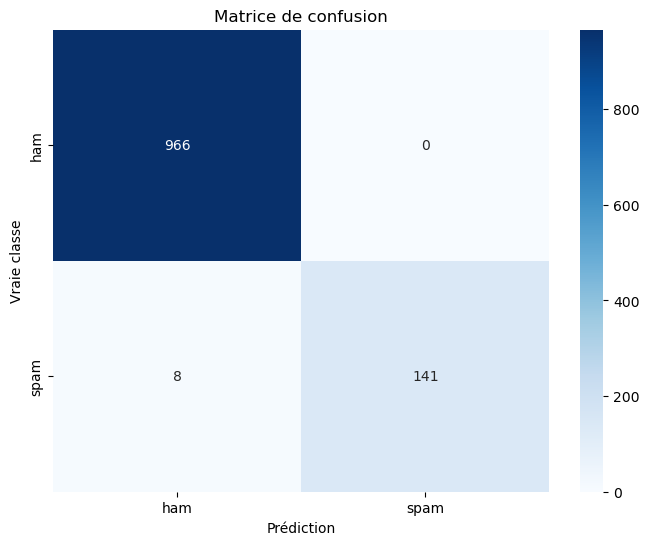

In [13]:
# Prédiction sur l'ensemble de test
y_pred = naive_bayes_model.predict(X_test_counts)

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.title('Matrice de confusion')
#plt.show()

# Enregistrer le graphique en tant qu'image PNG
plt.savefig('matrice_confusion.png')

# Affichage du rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Voici les données du rapport de classification dans un tableau :

|              | Précision | Rappel | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| Classe 0     | 0.99      | 1.00   | 1.00     | 966     |
| Classe 1     | 1.00      | 0.95   | 0.97     | 149     |
| Accuracy     |           |        |          | 0.99    |
| Macro avg    | 1.00      | 0.97   | 0.98     | 1115    |
| Weighted avg | 0.99      | 0.99   | 0.99     | 1115    |

Cela représente les métriques de précision, de rappel, de F1-score et le support pour chaque classe (0 pour la classe non-spam et 1 pour la classe spam), ainsi que les métriques macro-avg et weighted avg qui sont des agrégations des mesures par classe.

In [21]:
# Prédiction sur de nouvelles instances
def predict_new_instance(new_instance):
    # Transformez la nouvelle instance en vecteur de mots avec le même vocabulaire que celui utilisé lors de l'entraînement
    new_instance_vectorized = vectorizer.transform([new_instance])

    # Calculer les probabilités a priori de chaque classe
    p_class_0 = sum(y_train == 0) / len(y_train)
    p_class_1 = sum(y_train == 1) / len(y_train)
    
    # Calculer les probabilités conditionnelles pour chaque classe
    p_features_given_class_0 = naive_bayes_model.predict_proba(new_instance_vectorized)[0][0]
    p_features_given_class_1 = naive_bayes_model.predict_proba(new_instance_vectorized)[0][1]
    
    # Appliquer le théorème de Bayes pour prédire la classe la plus probable
    p_class_0_given_features = (p_features_given_class_0 * p_class_0) / (p_features_given_class_0 * p_class_0 + p_features_given_class_1 * p_class_1)
    p_class_1_given_features = (p_features_given_class_1 * p_class_1) / (p_features_given_class_0 * p_class_0 + p_features_given_class_1 * p_class_1)
    
    if p_class_0_given_features > p_class_1_given_features:
        return 0
    else:
        return 1

# Exemple d'utilisation : prédire la classe d'une nouvelle instance
new_instance = "Congratulations! You have won a free vacation to a luxurious resort. Claim your prize now!" # Exemple de contenu d'une nouvelle instance
predicted_class = predict_new_instance(new_instance)
print("Classe prédite pour la nouvelle instance :", predicted_class)


Classe prédite pour la nouvelle instance : 1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Initialisation des modèles
logistic_regression_model = LogisticRegression()
k_neighbors_model = KNeighborsClassifier()
ada_boost_model = AdaBoostClassifier()
gradient_boosting_model = GradientBoostingClassifier()
mlp_model = MLPClassifier()
gaussian_nb_model = GaussianNB()
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()

# Entraînement des modèles
logistic_regression_model.fit(X_train_counts, y_train)
k_neighbors_model.fit(X_train_counts, y_train)
ada_boost_model.fit(X_train_counts, y_train)
gradient_boosting_model.fit(X_train_counts, y_train)
mlp_model.fit(X_train_counts, y_train)
gaussian_nb_model.fit(X_train_counts.toarray(), y_train)  # Pour le modèle Naive Bayes gaussien, on doit utiliser .toarray()
lda_model.fit(X_train_counts.toarray(), y_train)
qda_model.fit(X_train_counts.toarray(), y_train)

# Prédiction sur les données de test
y_pred_lr = logistic_regression_model.predict(X_test_counts)
y_pred_knn = k_neighbors_model.predict(X_test_counts)
y_pred_ab = ada_boost_model.predict(X_test_counts)
y_pred_gb = gradient_boosting_model.predict(X_test_counts)
y_pred_mlp = mlp_model.predict(X_test_counts)
y_pred_gnb = gaussian_nb_model.predict(X_test_counts.toarray())
y_pred_lda = lda_model.predict(X_test_counts.toarray())
y_pred_qda = qda_model.predict(X_test_counts.toarray())

# Évaluation des performances des modèles
print("Performances du modèle de régression logistique :")
print(classification_report(y_test, y_pred_lr))

print("Performances du modèle des k plus proches voisins :")
print(classification_report(y_test, y_pred_knn))

print("Performances du modèle AdaBoost :")
print(classification_report(y_test, y_pred_ab))

print("Performances du modèle Gradient Boosting :")
print(classification_report(y_test, y_pred_gb))

print("Performances du modèle MLP (réseau de neurones) :")
print(classification_report(y_test, y_pred_mlp))

print("Performances du modèle Naive Bayes gaussien :")
print(classification_report(y_test, y_pred_gnb))

print("Performances du modèle LDA (Analyse Discriminante Linéaire) :")
print(classification_report(y_test, y_pred_lda))

print("Performances du modèle QDA (Analyse Discriminante Quadratique) :")
print(classification_report(y_test, y_pred_qda))


/home/hyont-nick/anaconda3/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Performances du modèle de régression logistique :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Performances du modèle des k plus proches voisins :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.44      0.61       149

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.93      0.93      0.91      1115

Performances du modèle AdaBoost :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.87      0.90       149

    accuracy                           0.97   

Voici une table récapitulative des performances des différents modèles :

| Modèle                                | Précision (classe 0) | Précision (classe 1) | Rappel (classe 0) | Rappel (classe 1) | F1-score (classe 0) | F1-score (classe 1) | Accuracy |
|---------------------------------------|-----------------------|-----------------------|-------------------|-------------------|----------------------|----------------------|----------|
| Régression logistique                 | 0.98                  | 1.00                  | 1.00              | 0.90              | 0.99                 | 0.95                 | 0.99     |
| K plus proches voisins                | 0.92                  | 1.00                  | 1.00              | 0.44              | 0.96                 | 0.61                 | 0.93     |
| AdaBoost                              | 0.98                  | 0.93                  | 0.99              | 0.87              | 0.98                 | 0.90                 | 0.97     |
| Gradient Boosting                     | 0.97                  | 0.98                  | 1.00              | 0.83              | 0.99                 | 0.90                 | 0.98     |
| MLP (réseau de neurones)              | 0.99                  | 1.00                  | 1.00              | 0.92              | 0.99                 | 0.96                 | 0.99     |
| Naive Bayes gaussien                  | 0.99                  | 0.60                  | 0.91              | 0.93              | 0.95                 | 0.73                 | 0.91     |
| LDA (Analyse Discriminante Linéaire)  | 0.97                  | 0.98                  | 1.00              | 0.80              | 0.98                 | 0.88                 | 0.97     |
| QDA (Analyse Discriminante Quadratique)| 0.97                  | 0.49                  | 0.87              | 0.83              | 0.92                 | 0.62                 | 0.86     |
| Naive Bayes multinomial               | 0.99                  | 1.00                  | 1.00              | 0.95              | 0.99                 | 0.97                 | 0.99     |

Cette table résume les performances de chaque modèle en termes de précision, de rappel, de F1-score et d'accuracy pour chaque classe (0 pour les courriels non-spam, 1 pour les courriels spam). Vous pouvez utiliser ces mesures pour comparer et choisir le modèle qui convient le mieux à votre problème de classification. En général, le modèle avec la plus haute précision, rappel, F1-score et accuracy serait considéré comme le meilleur pour cette tâche spécifique.

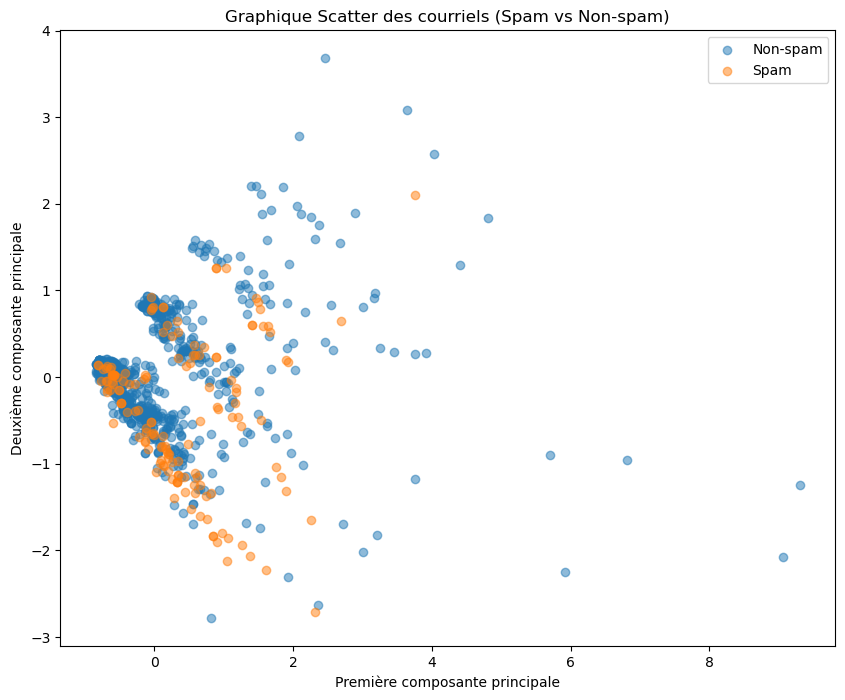

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire la dimensionnalité des données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_counts.toarray())

# Créer un graphique scatter
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_test == 0, 0], X_pca[y_test == 0, 1], label='Non-spam', alpha=0.5)
plt.scatter(X_pca[y_test == 1, 0], X_pca[y_test == 1, 1], label='Spam', alpha=0.5)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Graphique Scatter des courriels (Spam vs Non-spam)')
plt.legend()
plt.show()
